# First Name: Li
# Last Name: Chengjie

# Import Libraries  

In [264]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi 
import matplotlib.pyplot as plt
from scipy import stats


# Import Data

In [265]:
bottle = pd. read_csv('bottle.csv')
bottle.head()

C:\Users\flab\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (48,74) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Cst_Cnt,Btl_Cnt,Sta_ID,Date,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,1949-03,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,1949-03,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,1949-03,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,1949-03,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,1949-03,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data management 

In [267]:
grouping = bottle[['Depthm','Salnty']]
grouping

,Depthm,Salnty
0,0,33.4400
1,8,33.4400
2,10,33.4370
3,19,33.4200
4,20,33.4210
...,...,...
864858,0,33.4083
864859,2,33.4083
864860,5,33.4150
864861,10,33.4062


In [268]:
print ('max')
max1 = bottle['Depthm'].max()
print (max1)
print ('min')
min1 = bottle['Depthm'].min()
print (min1)


max
5351
min
0


# GROUP 1 Depthm 0-500

In [269]:
group1 = grouping[(grouping['Depthm']>= bottle['Depthm'].min()) & (grouping['Depthm']<= 800)]
group1.head()

,Depthm,Salnty
0,0,33.440
1,8,33.440
2,10,33.437
3,19,33.420
4,20,33.421


In [270]:
group1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 827452 entries, 0 to 864862
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Depthm  827452 non-null  int64  
 1   Salnty  785627 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 18.9 MB


In [271]:
print('group 1 mean')
mean1 =  group1['Salnty'].mean()
print(mean1)

group 1 mean
33.81314186808742


In [272]:
group1 = group1.fillna(value=mean1)
group1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 827452 entries, 0 to 864862
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Depthm  827452 non-null  int64  
 1   Salnty  827452 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 18.9 MB


# Group 2 Depthm 500-1000

In [273]:
group2 = grouping[(grouping['Depthm']>= 500) & (grouping['Depthm']<= 1000)]
group2.head()

,Depthm,Salnty
23,500,34.113
24,598,34.160
25,600,34.161
26,700,34.210
27,800,34.261


In [274]:
group2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96482 entries, 23 to 864857
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Depthm  96482 non-null  int64  
 1   Salnty  87815 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 2.2 MB


In [275]:
print('group 2 mean')
mean2 =  group2['Salnty'].mean()
print(mean2)

group 2 mean
34.345009104367875


In [276]:
group2 = group2.fillna(value=mean2)
group2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96482 entries, 23 to 864857
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Depthm  96482 non-null  int64  
 1   Salnty  96482 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 2.2 MB


# Group 3 Depthm 2000-5000

In [282]:
group3 = grouping[(grouping['Depthm']>= 1000) & (grouping['Depthm']<= bottle['Depthm'].max())]
group3.head()

,Depthm,Salnty
57,1000,34.378
58,1100,34.403
59,1200,34.429
60,1203,34.430
89,1000,34.336


In [283]:
group3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25531 entries, 57 to 864284
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Depthm  25531 non-null  int64  
 1   Salnty  21855 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 598.4 KB


In [284]:
print('group 3 mean')
mean3 =  group3['Salnty'].mean()
print(mean3)

group 3 mean
34.53865516357782


In [285]:
group3 = group3.fillna(value=mean3)
group3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25531 entries, 57 to 864284
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Depthm  25531 non-null  int64  
 1   Salnty  25531 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 598.4 KB


# Box Plot

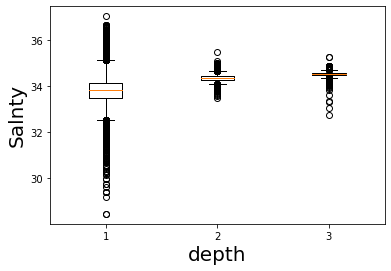

In [286]:
plt. boxplot([group1['Salnty'],group2['Salnty'],group3['Salnty']])
plt. xlabel('depth',fontsize= 20.0)
plt. ylabel('Salnty',fontsize= 20.0)
plt. show()

# ANOVA

In [262]:
f, p = stats.f_oneway(np. array(group1['Salnty']),
np. array(group2['Salnty']),
np. array(group3['Salnty']))
print ('F value:', f)
print ('P value:', p, '\n')

F value: 105304.68144086984
P value: 0.0 



# conclusion

p-value = 0 
Reject (Salnty and depth are related)